# Traveler Trip dataset  🎒🚶‍♀️

### Import relevant libraries <a class="anchor" id="import"></a>

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read data <a class="anchor" id="read"></a>

In [105]:
df = pd.read_csv('Travel-details-dataset.csv')

In [103]:
df.info()
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               139 non-null    int64  
 1   Destination           137 non-null    object 
 2   Start date            137 non-null    object 
 3   End date              137 non-null    object 
 4   Duration (days)       137 non-null    float64
 5   Traveler name         137 non-null    object 
 6   Traveler age          137 non-null    float64
 7   Traveler gender       137 non-null    object 
 8   Traveler nationality  137 non-null    object 
 9   Accommodation type    137 non-null    object 
 10  Accommodation cost    137 non-null    object 
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 14.2+ KB


,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
23,24,Bangkok,9/15/2023,9/23/2023,8.0,Raj Patel,40.0,Male,Indian,Hostel,$400,Plane,$500
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
7,8,"Rio de Janeiro, Brazil",1/5/2024,1/12/2024,7.0,Lucas Santos,25.0,Male,Brazilian,Airbnb,900,Flight,600
84,85,Tokyo,7/1/2021,7/10/2021,10.0,Sarah Lee,28.0,Female,Korean,Airbnb,500 USD,Train,300 USD
104,105,Amsterdam,10/10/2024,10/17/2024,7.0,Robert Mueller,41.0,Male,Germany,Hotel,$600,Train,$150
129,130,"Tokyo, Japan",5/15/2023,5/22/2023,7.0,Jane Smith,28.0,Female,British,Airbnb,7000,Train,1500
15,16,"Edinburgh, Scotland",9/5/2024,9/12/2024,7.0,James MacKenzie,32.0,Male,Scottish,Hotel,900,Train,150
64,65,Barcelona,8/18/2023,8/25/2023,7.0,Ana Rodriguez,31.0,Female,Spanish,Vacation rental,900,Plane,700
53,54,"Rio de Janeiro, Brazil",1/15/2024,1/24/2024,9.0,Felipe Almeida,30.0,Male,Brazilian,Airbnb,$800,Train,$150
43,44,"London, UK",3/5/2023,3/12/2023,7.0,Peter Brown,55.0,Male,British,Airbnb,900,Train,100


Clean collumn names <a class="anchor" id="cleancols"></a>

In [107]:
def clean_col_names(df):
    new_cols = []
    for col in df.columns:
        new_col = col.strip().lower().replace(' ', '_').replace('(', '').replace(')', '')
        new_cols.append(new_col)
    df.columns = new_cols
    
    return df

In [108]:
clean_col_names(df)

,trip_id,destination,start_date,end_date,duration_days,traveler_name,traveler_age,traveler_gender,traveler_nationality,accommodation_type,accommodation_cost,transportation_type,transportation_cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
135,136,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
136,137,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
137,138,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500


## Exploratory Data Analysis <a class="anchor" id="accommodation"></a>

### Accommodation <a class="anchor" id="accommodation"></a>

In [109]:
df.accommodation_cost.unique()

array(['1200', '800', '1000', '2000', '700', '1500', '500', '900', '2500',
       '3000', '1400', '600', '$900 ', '$1,500 ', '$1,200 ', '$600 ',
       '$1,000 ', '$700 ', '$400 ', '$1,400 ', '$2,000 ', '$1,100 ',
       '$800 ', '$200 ', '$150 ', '$500 ', '$180 ', '$350 ', '2200',
       '400', '1100', '300', '1300', '1800', nan, '500 USD', '1000 USD',
       '800 USD', '1200 USD', '400 USD', '600 USD', '900 USD', '1500 USD',
       '700 USD', '100', '300 USD', '200 USD', '$300 ', '200', '5000',
       '7000', '6000', '4000', '8000'], dtype=object)

Remove '$', 'USD' and ',' to convert to float

In [110]:
df.accommodation_cost = df.accommodation_cost.replace({' USD': ''}, regex = True) 

In [111]:
df.accommodation_cost = df.accommodation_cost.str.replace('$', '', regex = True)

In [112]:
df.accommodation_cost = df.accommodation_cost.replace({',': ''}, regex = True) 

In [113]:
df.accommodation_cost = df.accommodation_cost.astype(float)

In [114]:
df['acc_daily_cost'] = df.accommodation_cost/df.duration_days

Accomoddation cost refers to the entire trip, so to be able to compare costs accross accommodation types, we will transform the total cost to cost by day. Let's create a collumn for that.

In [115]:
def get_mean_by_groups(df, group_column, value_column):
  grouped_df = df.groupby(group_column)
  mean_df = grouped_df[value_column].mean().round()
  std_df = grouped_df[value_column].std().round()
  mean_df.sort_values(ascending=False, inplace=True)
  std_df.sort_values(ascending=False, inplace=True)

  plt.bar(mean_df.index, mean_df.values)
  plt.title('Mean')
  #plt.ylabel('')
  #plt.xlabel('')
  plt.xticks(rotation=90)
  plt.show()
    
  plt.bar(std_df.index, std_df.values)
  plt.title("Standard Deviation")
 # plt.ylabel(ylabel)
  #plt.xlabel(xlabel)
  plt.xticks(rotation=90)
  plt.show()

  return print('Mean values', mean_df, 'Standard Deviation values', std_df)

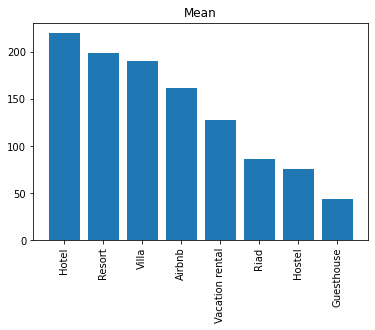

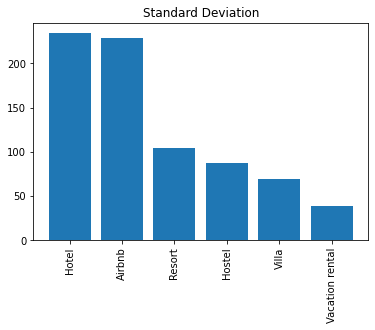

Mean values accommodation_type
Hotel              220.0
Resort             199.0
Villa              191.0
Airbnb             162.0
Vacation rental    128.0
Riad                86.0
Hostel              76.0
Guesthouse          44.0
Name: acc_daily_cost, dtype: float64 Standard Deviation values accommodation_type
Hotel              234.0
Airbnb             229.0
Resort             105.0
Hostel              88.0
Villa               69.0
Vacation rental     39.0
Guesthouse           NaN
Riad                 NaN
Name: acc_daily_cost, dtype: float64


In [116]:
get_mean_by_groups(df, 'accommodation_type', 'acc_daily_cost')

In [117]:
acc_counts = df.accommodation_type.value_counts()
acc_counts

Hotel              60
Airbnb             30
Hostel             24
Resort             14
Villa               4
Vacation rental     3
Riad                1
Guesthouse          1
Name: accommodation_type, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Hotel'),
  Text(1, 0, 'Airbnb'),
  Text(2, 0, 'Hostel'),
  Text(3, 0, 'Resort'),
  Text(4, 0, 'Villa'),
  Text(5, 0, 'Vacation rental'),
  Text(6, 0, 'Riad'),
  Text(7, 0, 'Guesthouse')])

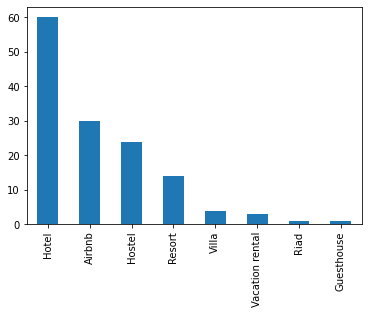

In [118]:
acc_counts.plot(kind='bar')
plt.xticks(rotation=90)

In [119]:
df_accommodation = df.loc[:,['accommodation_type', 'acc_daily_cost']]
df_accommodation
df_accommodation.groupby('accommodation_type').describe().round()

acc_daily_cost                                            \
                            count   mean    std    min    25%    50%    75%   
accommodation_type                                                            
Airbnb                       30.0  162.0  229.0   44.0   68.0   95.0  126.0   
Guesthouse                    1.0   44.0    NaN   44.0   44.0   44.0   44.0   
Hostel                       24.0   76.0   88.0   17.0   32.0   50.0   58.0   
Hotel                        60.0  220.0  234.0   14.0  120.0  153.0  200.0   
Resort                       14.0  199.0  105.0   71.0  110.0  174.0  292.0   
Riad                          1.0   86.0    NaN   86.0   86.0   86.0   86.0   
Vacation rental               3.0  128.0   39.0   89.0  109.0  129.0  148.0   
Villa                         4.0  191.0   69.0  136.0  141.0  171.0  221.0   

                            
                       max  
accommodation_type          
Airbnb              1000.0  
Guesthouse            44.0  
Hostel               333.0  
Hotel               1143.0  
Resort               375.0  
Riad                  86.0  
Vacation rental      167.0  
Villa                286.0

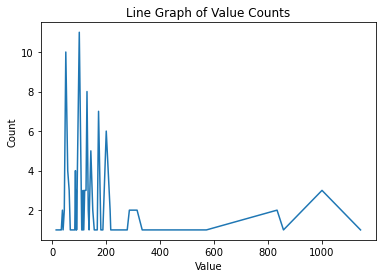

In [120]:
df_accommodation2 = df_accommodation['acc_daily_cost'].value_counts()

# Plot the line graph
ax = sns.lineplot(x=df_accommodation2.index, y=df_accommodation2.values)

# Add a title and labels
plt.title('Line Graph of Value Counts')
plt.xlabel('Value')
plt.ylabel('Count')

# Show the plot
plt.show()

## Transportation <a class="anchor" id="transportation"></a>

In [232]:
df.transportation_cost.unique()

array(['600', '500', '700', '1000', '200', '800', '1200', '100', '400',
       '150', '400 ', '700 ', '150 ', '800 ', '100 ', '600 ', '80 ',
       '500 ', '300 ', '50 ', '120 ', '75 ', '900', '50', '200 ', '250 ',
       '20 ', '300', nan, '350', '1200 ', '900 ', '1500 ', '1000 ', '250',
       '2500', '1500', '2000', '3000'], dtype=object)

In [223]:
df.transportation_cost = df.transportation_cost.replace({' USD': ''}, regex = True)

In [229]:
df.transportation_cost = df.transportation_cost.str.replace('$', '', regex = True)

In [231]:
df.transportation_cost = df.transportation_cost.replace({',': ''}, regex = True) 

In [234]:
df.transportation_cost = df.transportation_cost.astype(float)

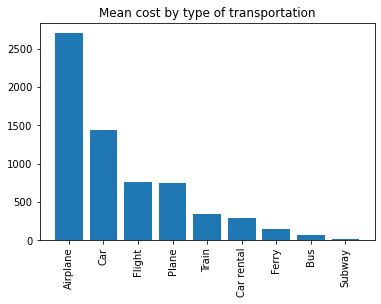

transportation_type
Airplane      2700.0
Car           1433.0
Flight         754.0
Plane          754.0
Train          345.0
Car rental     296.0
Ferry          150.0
Bus             71.0
Subway          20.0
Name: transportation_cost, dtype: float64

In [235]:
get_mean_by_groups(df, 'transportation_type', 'transportation_cost', 'Mean cost by type of transportation','','').round()

In [249]:
def revert_col_names(df):
    new_cols = []
    for col in df.columns:
        new_col = col.strip().replace('_', ' ').title()
        new_cols.append(new_col)
    df.columns = new_cols
    
    return df

## Export data to excel <a class="anchor" id="export"></a>

In [250]:
revert_col_names(df)

,Trip Id,Destination,Start Date,End Date,Duration (Days),Traveler Name,Traveler Age,Traveler Gender,Traveler Nationality,Accommodation Type,Accommodation Cost,Transportation Type,Transportation Cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200.0,Flight,600.0
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800.0,Flight,500.0
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000.0,Flight,700.0
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000.0,Flight,1000.0
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700.0,Train,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500.0,Car,2000.0
135,136,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000.0,Airplane,3000.0
136,137,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000.0,Train,1000.0
137,138,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000.0,Airplane,2500.0


In [251]:
df.to_excel("traveler-data.xlsx") 